<a href="https://colab.research.google.com/github/18ME10049/Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**LOAD THE DATASET**

In [43]:
data = pd.read_csv("train_ctrUa4K.csv")

In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
data.info()
print(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
614


In [46]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [48]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
data['Gender'].mode()

0    Male
dtype: object

In [50]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [53]:
data.Dependents.describe()

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

In [54]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan , strategy = 'mean')
imputer2 = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

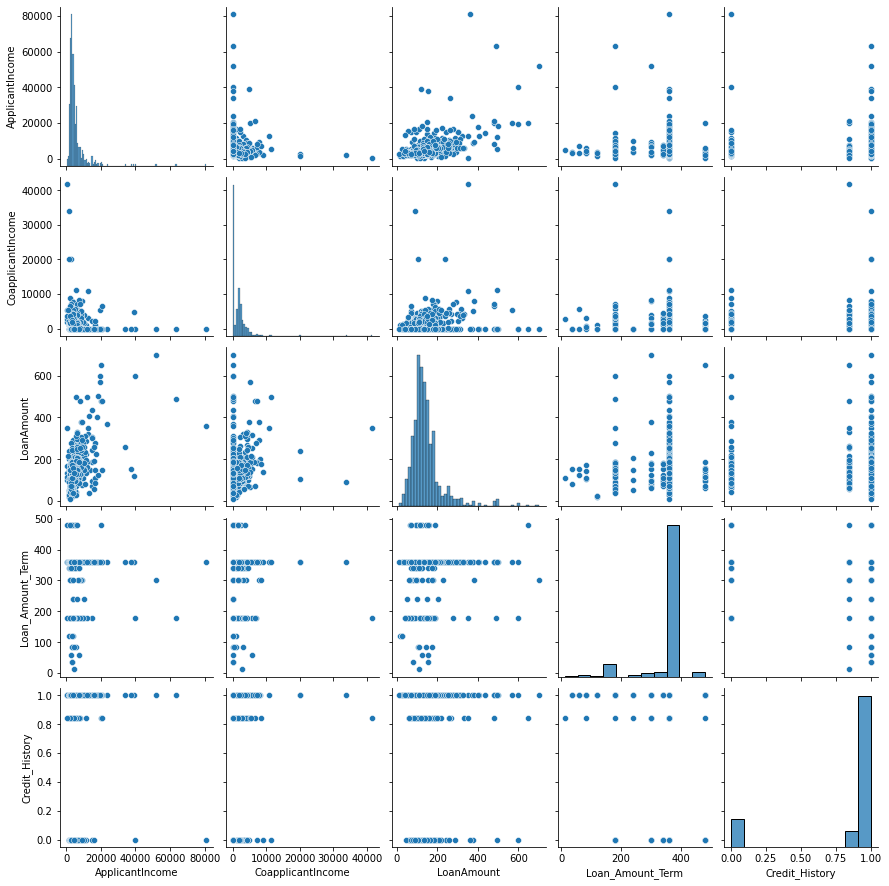

In [55]:
sns.pairplot(data=data)

In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


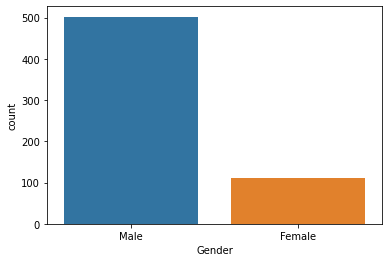

In [57]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


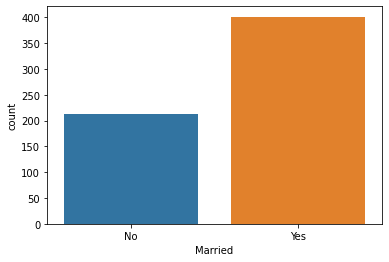

In [58]:
sns.countplot(data['Married'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


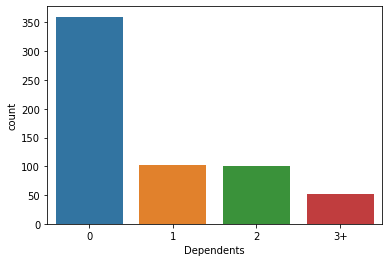

In [59]:
sns.countplot(data['Dependents'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


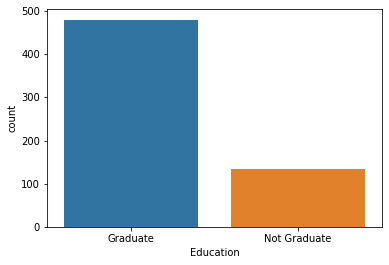

In [60]:
sns.countplot(data['Education'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


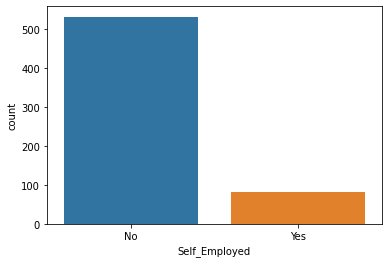

In [61]:
sns.countplot(data['Self_Employed'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


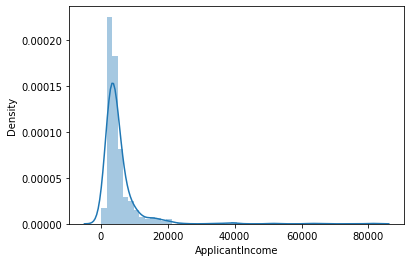

In [62]:
sns.distplot(data['ApplicantIncome'])

In [63]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [65]:
cols = ['Loan_ID' , 'CoapplicantIncome']
data = data.drop(columns=cols)

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,141.000000,360.0,1.0,Urban,Y,6000.0


In [67]:
data['TotalIncome'] = np.log(data['TotalIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


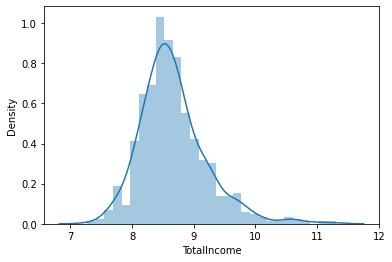

In [68]:
sns.distplot(data['TotalIncome'])

In [69]:
data['LoanAmount'][0] = 120
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,120.0,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y,8.699515


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


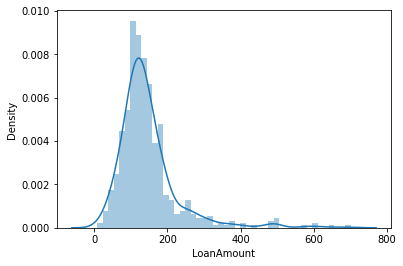

In [70]:
sns.distplot(data['LoanAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


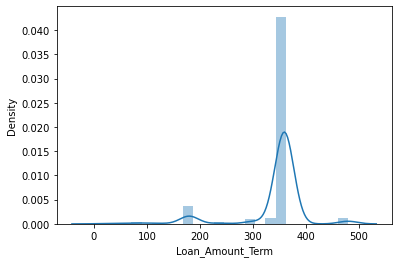

In [71]:
sns.distplot(data['Loan_Amount_Term'])

In [72]:
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])

In [73]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,8.674026,4.787492,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,8.430109,4.852030,5.886104,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,7.856707,4.787492,5.886104,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,8.699515,4.948760,5.886104,1.0,Urban,Y,8.699515


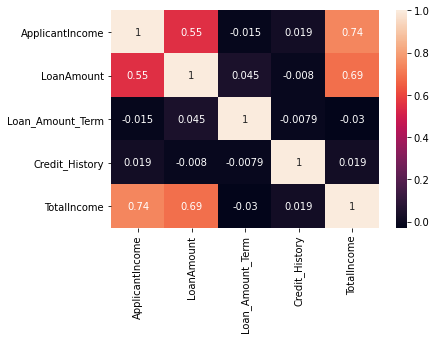

In [74]:
corr = data.corr()
sns.heatmap(corr , annot=True)

In [75]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender' ,'Married' ,'Education' , 'Self_Employed' , 'Property_Area' , 'Loan_Status' , 'Dependents']
le = LabelEncoder()
for col in cols:
   data[col] = le.fit_transform(data[col])

In [77]:
data['LoanAmount'] = np.log(data['LoanAmount'])

In [78]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674026,4.787492,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1,8.699515


**Perform Various Model**

In [79]:
X = data.drop(columns='Loan_Status' , axis=1)
Y = data['Loan_Status']

In [83]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y  , test_size = 0.3 , random_state=1)

In [93]:
#classify function
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

def classify(model):
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Training_accuracy of the model is " ,accuracy_score(y_train, train_pred))
    print("Test_accuracy of the model is " ,accuracy_score(y_test, y_pred)) 
    print("F1_SCORE of the model is " ,f1_score(y_test,y_pred))

In [103]:
from sklearn.linear_model import LogisticRegression
classfier1 = LogisticRegression(max_iter=1000,C=10.10,)

classify(classfier1)

Training_accuracy of the model is  0.8181818181818182
Test_accuracy of the model is  0.7945945945945946
F1_SCORE of the model is  0.8652482269503546


In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=20,max_leaf_nodes=15)
classify(classifier2)

Training_accuracy of the model is  0.8508158508158508
Test_accuracy of the model is  0.7945945945945946
F1_SCORE of the model is  0.8602941176470589
